# Final Case Study
A classification on poker hands

# Imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import heapq
import joblib
import random
import xgboost as xgb
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, root_mean_squared_error, mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, root_mean_squared_log_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime

# Dataframe

In [23]:
df_train = pd.read_csv('./poker-hand-training-true.csv')
df_test = pd.read_csv('./poker-hand-testing.csv')

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 25010 entries, (np.int64(1), np.int64(10)) to (np.int64(1), np.int64(7))
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25010 non-null  int64
 1   C1      25010 non-null  int64
 2   S2      25010 non-null  int64
 3   C2      25010 non-null  int64
 4   S3      25010 non-null  int64
 5   C3      25010 non-null  int64
 6   S4      25010 non-null  int64
 7   C4      25010 non-null  int64
 8   Class   25010 non-null  int64
dtypes: int64(9)
memory usage: 1.8 MB


In [25]:
# Each number represents categorical info
df_mod = df_train.apply(lambda x: x.astype('category'))

In [26]:
X = df_mod.drop(columns=['Class'])
y = df_mod['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [27]:
model = xgb.XGBClassifier(random_state= 42, enable_categorical=True)
# model.fit(X_train, y_train)

In [33]:
# Set up the parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Step size
    'max_depth': [2, 4, 5, 6, 8],                  # Max depth of trees
    'min_child_weight': [2, 3, 4, 6],               # Minimum sum of instance weight in a child
    'subsample': [0.7, 0.8, 1.0],               # Fraction of data to sample for each boosting round
    'colsample_bytree': [0.7, 0.8, 1.0]         # Fraction of features to use for each tree
}

In [35]:
# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


KeyboardInterrupt: 

In [30]:
# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.8}
Best cross-validation accuracy: 0.7125649996796153


In [31]:
best_model = grid_search.best_estimator_

In [32]:
pred_best = best_model.predict(X_test)
acc_best = accuracy_score(y_test, pred_best)
display(acc_best)

0.7305077968812475

# Predictions

In [18]:
pred_main = model.predict(X_test)
# pred_test
acc_main = accuracy_score(y_test, pred_main)
# acc_test
display(acc_main)
# display(acc_mini)

0.7031187524990004

<Axes: >

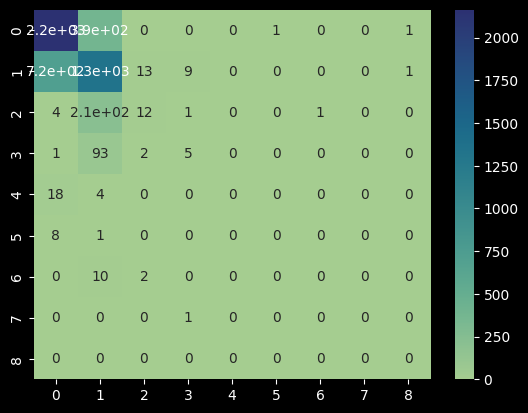

In [19]:
cm = confusion_matrix(y_test, pred_main)
sns.heatmap(cm, annot=True, cmap='crest')